# 스펨 메일 처리

---

Accuracy: 0.9850567842199641
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1447
           1       0.93      0.96      0.95       226

    accuracy                           0.99      1673
   macro avg       0.96      0.97      0.97      1673
weighted avg       0.99      0.99      0.99      1673



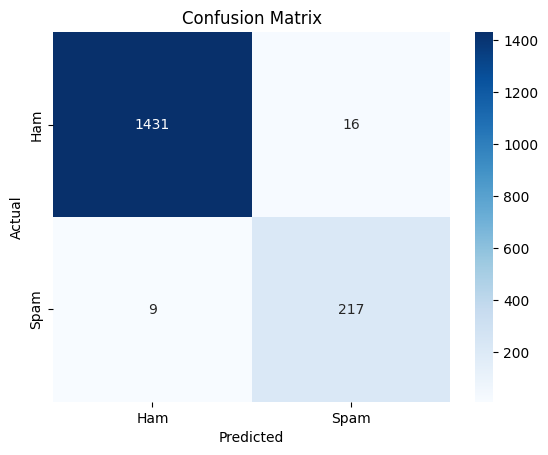

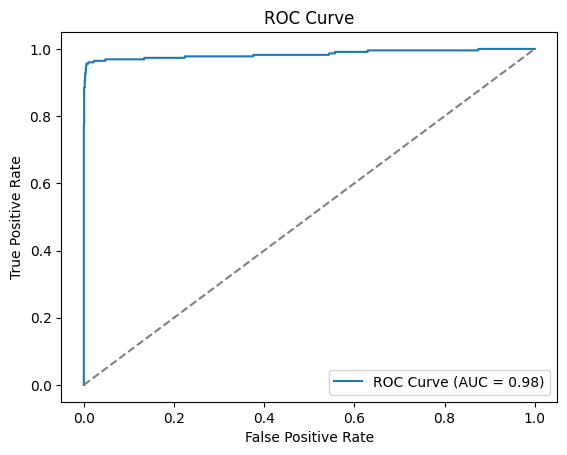

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
url = 'https://raw.githubusercontent.com/YeeeeeHo/ML_Final/refs/heads/main/example/classification/sms_spam.csv'
data = pd.read_csv(url, header=None, names=['label', 'message'])

# 데이터 전처리
data = data.dropna()  # 결측값 제거
data = data[data['label'].isin(['ham', 'spam'])]  # 유효한 값만 남기기
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # 라벨 인코딩

# 텍스트 데이터 벡터화
X = data['message']
y = data['label']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습 및 예측
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 평가 결과
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve 시각화
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


---

# 유방암 데이터

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
url = "https://raw.githubusercontent.com/YeeeeeHo/ML_Final/refs/heads/main/example/classification/breast_cancer.csv"
data = pd.read_csv(url)

# 데이터 준비
X = data.iloc[:, :-1]  # 특성 데이터
y = data['diagnosis'].map({'M': 1, 'B': 0})  # 진단 라벨 인코딩

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습 및 예측
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 평가 결과
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve 시각화
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


ValueError: could not convert string to float: 'B'